 # Real-Estate Price Predictor

In [1]:
import pandas as pd
import numpy as np

In [2]:
housing  = pd.read_csv("finaldata.csv")

In [3]:
#housing.head()

In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
housing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [6]:
housing.describe()



,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
# # for printing Histogram
# %matplotlib inline
# import matplotlib.pyplot as plt
# housing.hist(bins=50, figsize=(20,15)) 

# Train-Test Splitting

In [8]:
# #for learning purpose
# import numpy as np

# def split_train_test(data,test_ratio):
#     np.random.seed(42)
   
#     shuffled = np.random.permutation(len(data))
#     print(shuffled)
#     test_set_size = int(len(data) * test_ratio)
#     test_indices = shuffled[:test_set_size]
#     train_indices = shuffled[test_set_size:]
#     return data.iloc[train_indices],data.iloc[test_indices]

In [9]:
#print(f"Rows in train set: {len(train_set)}\nRows  in test set :{len(test_set)}")

# scikit-learn train-test splitting

In [10]:
from sklearn.model_selection import train_test_split
train_set , test_set = train_test_split(housing, test_size=0.2 ,random_state =42)

In [11]:
print(f"Rows in train set: {len(train_set)}\nRows  in test set :{len(test_set)}")

Rows in train set: 404
Rows  in test set :102


In [12]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits = 1,test_size = 0.2, random_state=42)
for train_index , test_index in split.split(housing, housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
    

In [13]:
strat_test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [14]:
# 95/7

In [15]:
strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [16]:
# 376/28

In [17]:
housing = strat_train_set.copy()


# looking for correlations

In [18]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.679894
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

In [19]:
# from pandas.plotting import scatter_matrix
# attr = ["MEDV","ZN","RM","LSTAT"]
# scatter_matrix(housing[attr],figsize= (12,8))

In [20]:
from pandas.plotting import scatter_matrix


<AxesSubplot:xlabel='RM', ylabel='MEDV'>

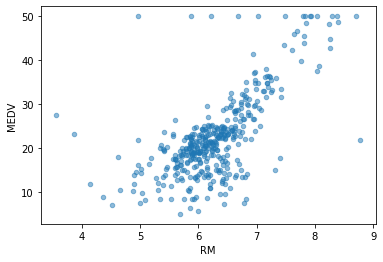

In [21]:
housing.plot(kind="scatter",x="RM",y="MEDV", alpha=0.5)

<AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>

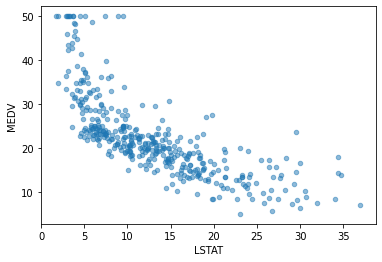

In [22]:
housing.plot(kind="scatter",x="LSTAT",y="MEDV", alpha=0.5)

# Trying out Attribute combination

In [23]:
# housing["TAX/Room"]=housing['TAX']/housing['RM']

In [24]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0


In [25]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.679894
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

In [26]:
# housing.plot(kind="scatter",x="TAX/Room",y="MEDV", alpha=0.5)

In [27]:
housing = strat_train_set.drop("MEDV",axis = 1)
housing_labels = strat_train_set["MEDV"].copy()

## Missing Attributes

to take care of missng attributes you have 3 options:

    1.Get rid of the missing data points
    
    2.Get rid  of the whole attributes
    
    3.Set the value to some value(0,mean or median)

In [28]:
# a= housing.dropna(subset=["RM"])  #option 1
# a.shape

In [29]:
# housing.drop("RM",axis=1)  #option 2
# #rm column gets deleted

In [30]:
median=housing["RM"].median()   #option 3 using median
housing["RM"].fillna(median)
housing.shape

(404, 13)

In [31]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median")
imputer.fit(housing)

SimpleImputer(strategy='median')

In [32]:
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.21000e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [33]:
# it means it has calculated medians for all the columns in of the dataset

In [34]:
x = imputer.transform(housing)

In [35]:
housing_tr = pd.DataFrame(x,columns=housing.columns)

In [36]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.279908,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712983,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.210000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


# Sci-Kit learn Design


primarily 3 types of object:

    1. Estimators
    
    2. Transformers
    
    3. Predictors

# Feature  Scaling

two types of feature :
    
    1. MinMax Scaling (Normalization)
    
    2. Standard Scaling

# Pipeline


In [37]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler',StandardScaler()),
])

In [38]:
housing_num_tr = my_pipeline.fit_transform(housing)

In [39]:
# housing_tr
housing.shape

(404, 13)

# Selecting a desired Model for the project

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# model = LinearRegression()
# model = DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(housing_num_tr,housing_labels)

RandomForestRegressor()

In [41]:
some_data = housing.iloc[:5]

In [42]:
some_labels = housing_labels.iloc[:5]

In [43]:
prepared_data = my_pipeline.transform(some_data)

In [44]:
model.predict(prepared_data)

array([22.268, 25.324, 16.237, 23.335, 23.463])

In [45]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

# Evaluating the model

In [46]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels,housing_predictions)
rmse = np.sqrt(mse)

In [47]:
rmse  #this shows the mean squared error
#if error is zero then there is overfitting

1.1837150697429817

# Cross Validation - Better Evaluation Technique

In [48]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,housing_num_tr,housing_labels,scoring = "neg_mean_squared_error",cv=10)  # greater  is better
rmse_scores = np.sqrt(-scores)

In [49]:
rmse_scores    

array([2.80687452, 2.88553102, 4.44803911, 2.66002434, 3.35453933,
       2.60983073, 5.03196157, 3.27025077, 2.94917021, 3.22544872])

In [50]:
def print_scores(scores):
    print("Scores are: ",scores)
    print("mean : ",scores.mean())
    print("Standard Deviation: ",scores.std())
    
    

In [51]:
print_scores(rmse_scores)

Scores are:  [2.80687452 2.88553102 4.44803911 2.66002434 3.35453933 2.60983073
 5.03196157 3.27025077 2.94917021 3.22544872]
mean :  3.324167033976478
Standard Deviation:  0.7579711699611762


# saving the model

In [52]:
from joblib import dump, load
dump(model,'Arpan.joblib')

['Arpan.joblib']

# testing the model

In [53]:
x_test= strat_test_set.drop("MEDV",axis=1)
y_test = strat_test_set["MEDV"].copy()
x_test_prepared = my_pipeline.transform(x_test)
final_predictions= model.predict(x_test_prepared)
final_mse = mean_squared_error(y_test,final_predictions)
final_rmse = np.sqrt(final_mse)

In [54]:
final_rmse   

2.9139852755761315

In [55]:
prepared_data[0]

array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.24141041, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034])

# Using the models

In [56]:
from joblib import dump,load
import numpy as np
model =load('Arpan.joblib')
features = np.array([[-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.24141041, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034]])
model.predict(features)

array([22.268])